In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import glob
mpl.rcParams['font.size'] = 18
#%matplotlib notebook
#import matplotlib as mpl
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
#from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
#import matplotlib.patches as patches

In [2]:
def read_file_real(fname):
    columns = "Region Material GeV/pr W Err".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', skiprows=13,comment='#')
    
    return df

In [3]:
df_ed_chan_tacw = read_file_real('2022_MT_BLM_TACW_chan/Region.dat')[:-2]
df_ed_amorphous_tacw = read_file_real('2022_MT_BLM_TACW_amorph/Region.dat')[:-2]

df_ed_chan_tcsm = read_file_real('2022_MT_BLM_TCSM_chan/Region.dat')[:-2]
df_ed_amorphous_tcsm = read_file_real('2022_MT_BLM_TCSM_amorph/Region.dat')[:-2]

regs = ['BLM_AIR', 'BLM_FF', 'BLM_HH', 'BLM_EL', 'BLM51659', 'BLMvert']

N_c_tacw = 4037000 #run_*/lss5-double_exp001_flka_coord.dat + run_*/fluka_*/flka_coord.dat
N_a_tacw = 4410000

N_c_tcsm = 1254600
N_a_tcsm = 3240000

In [4]:
#TACW
df_ed_chan_tacw.loc[df_ed_chan_tacw['Region'].isin(regs)];
BLM_c_tacw = df_ed_chan_tacw.loc[df_ed_chan_tacw['Region']=='BLMvert']
df_ed_amorphous_tacw.loc[df_ed_amorphous_tacw['Region'].isin(regs)];
BLM_a_tacw = df_ed_amorphous_tacw.loc[df_ed_amorphous_tacw['Region']=='BLMvert']

#TCSM
df_ed_chan_tcsm.loc[df_ed_chan_tcsm['Region'].isin(regs)];
BLM_c_tcsm = df_ed_chan_tcsm.loc[df_ed_chan_tcsm['Region']=='BLMvert']
df_ed_amorphous_tcsm.loc[df_ed_amorphous_tcsm['Region'].isin(regs)];
BLM_a_tcsm = df_ed_amorphous_tcsm.loc[df_ed_amorphous_tcsm['Region']=='BLMvert']


In [5]:
RF_tacw = BLM_a_tacw['W'].values/BLM_c_tacw['W'].values
RF_tcsm = BLM_a_tcsm['W'].values/BLM_c_tcsm['W'].values

#Error propagation:    A/C     Err = sqrt[((1/C)*E_A)**2 + ((-A/C**2)*E_C)**2]
E_A_tacw = BLM_a_tacw['Err'].values*0.01*BLM_a_tacw['W'].values
E_C_tacw = BLM_c_tacw['Err'].values*0.01*BLM_c_tacw['W'].values
A_tacw = BLM_a_tacw['W'].values
C_tacw = BLM_c_tacw['W'].values

E_A_tcsm = BLM_a_tcsm['Err'].values*0.01*BLM_a_tcsm['W'].values
E_C_tcsm = BLM_c_tcsm['Err'].values*0.01*BLM_c_tcsm['W'].values*0.01
A_tcsm = BLM_a_tcsm['W'].values
C_tcsm = BLM_c_tcsm['W'].values

Err_tacw = np.sqrt( (E_A_tacw/C_tacw)**2 + (-A_tacw*E_C_tacw/C_tacw**2)**2  )
Err_tcsm = np.sqrt( (E_A_tcsm/C_tcsm)**2 + (-A_tcsm*E_C_tcsm/C_tcsm**2)**2  )

Err_tacw,Err_tcsm

(array([0.18819185, 0.04389317, 0.00038641, 0.01858819, 0.00655463,
        0.01087812, 0.12137684, 0.10931044]),
 array([9.39360319e-02, 2.55530165e-01, 3.34530159e-01, 9.19693686e-05,
        1.05034341e-04, 1.55568482e-04, 1.02737464e-03, 6.54300702e-03]))

TACW0 in, BLM errors:
 [0.18819185 0.04389317 0.00038641 0.01858819 0.00655463 0.01087812
 0.12137684 0.10931044]

TCSM in, BLM errors:
 [9.39360319e-02 2.55530165e-01 3.34530159e-01 9.19693686e-05
 1.05034341e-04 1.55568482e-04 1.02737464e-03 6.54300702e-03]

TACW Amorphous, primaries:  4410000
TACW Channeling, primaries: 4037000
TCSM Amorphous, primaries:  3240000
TCSM Channeling, primaries: 1254600


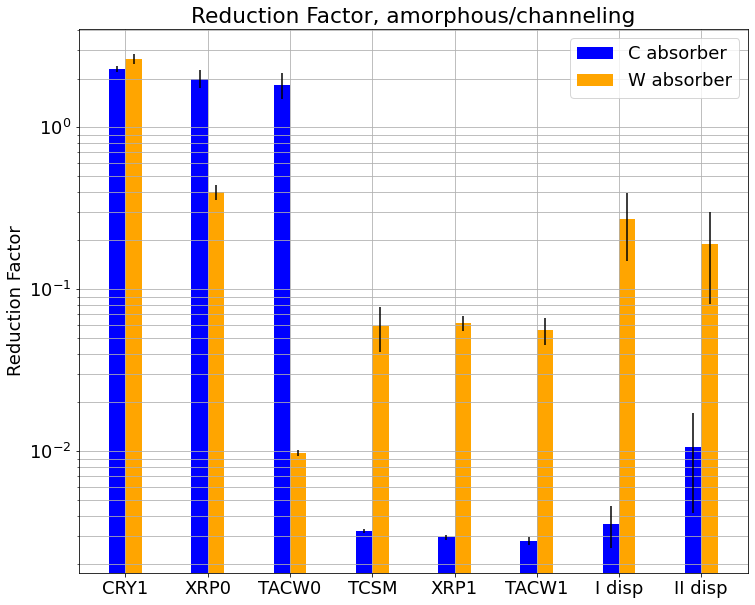

In [6]:
ax,fig = plt.subplots(figsize=(12,10))
#plt.plot(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],Err,'k+',ms=20);

plt.bar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','I disp','II disp'],RF_tcsm,width=-0.2,color='blue',align='edge',yerr=Err_tcsm,label='C absorber')
plt.bar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','I disp','II disp'],RF_tacw,width=0.2,color='orange',align='edge',yerr=Err_tacw,label='W absorber')

#plt.errorbar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],RF_tacw,yerr=Err_tacw,fmt='none',ecolor='k',barsabove=True)
#plt.errorbar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],RF_tcsm,yerr=Err_tcsm,fmt='none',ecolor='k',barsabove=True)


plt.yscale('log')
plt.title('Reduction Factor, amorphous/channeling')
plt.ylabel('Reduction Factor');
plt.grid(which='both')
plt.legend()
print('TACW0 in, BLM errors:\n',Err_tacw)
print('\nTCSM in, BLM errors:\n',Err_tcsm)

print('\nTACW Amorphous, primaries: ',N_a_tacw)
print('TACW Channeling, primaries:',N_c_tacw)
print('TCSM Amorphous, primaries: ',N_a_tcsm)
print('TCSM Channeling, primaries:',N_c_tcsm)

In [7]:
print('TACW Amorphous, primaries:',N_a_tacw)
BLM_a_tacw

TACW Amorphous, primaries: 4410000


,Region,Material,GeV/pr,W,Err
142,BLMvert,BLM.NITR,8.509000e-08,8.509000e-08,3.375
249,BLMvert,BLM.NITR,1.303000e-08,1.303000e-08,9.151
285,BLMvert,BLM.NITR,1.474000e-07,1.474000e-07,3.942
483,BLMvert,BLM.NITR,1.159000e-09,1.159000e-09,30.400
509,BLMvert,BLM.NITR,1.002000e-09,1.002000e-09,8.706
525,BLMvert,BLM.NITR,1.082000e-09,1.082000e-09,18.050
867,BLMvert,BLM.NITR,6.777000e-10,6.777000e-10,37.930
1283,BLMvert,BLM.NITR,1.199000e-10,1.199000e-10,48.560


In [8]:
print('TACW Channeling, primaries:',N_c_tacw)
BLM_c_tacw

TACW Channeling, primaries: 4037000


,Region,Material,GeV/pr,W,Err
142,BLMvert,BLM.NITR,3.212000e-08,3.212000e-08,6.2510
249,BLMvert,BLM.NITR,3.277000e-08,3.277000e-08,6.1740
285,BLMvert,BLM.NITR,1.508000e-05,1.508000e-05,0.2984
483,BLMvert,BLM.NITR,1.945000e-08,1.945000e-08,6.9940
509,BLMvert,BLM.NITR,1.624000e-08,1.624000e-08,6.0880
525,BLMvert,BLM.NITR,1.937000e-08,1.937000e-08,7.3100
867,BLMvert,BLM.NITR,2.499000e-09,2.499000e-09,23.7600
1283,BLMvert,BLM.NITR,6.287000e-10,6.287000e-10,30.4500


In [9]:
print('TCSM Amorphous, primaries:',N_a_tcsm)
BLM_a_tcsm

TCSM Amorphous, primaries: 3240000


,Region,Material,GeV/pr,W,Err
84,BLMvert,BLM.NITR,8.066000e-08,8.066000e-08,4.100
191,BLMvert,BLM.NITR,1.148000e-08,1.148000e-08,12.780
227,BLMvert,BLM.NITR,2.947000e-08,2.947000e-08,18.230
425,BLMvert,BLM.NITR,1.439000e-07,1.439000e-07,2.846
451,BLMvert,BLM.NITR,5.062000e-08,5.062000e-08,3.571
467,BLMvert,BLM.NITR,2.032000e-08,2.032000e-08,5.536
809,BLMvert,BLM.NITR,9.876000e-10,9.876000e-10,28.930
1225,BLMvert,BLM.NITR,1.109000e-10,1.109000e-10,61.300


In [10]:
print('TCSM Channeling, primaries:',N_c_tcsm)
BLM_c_tcsm

TCSM Channeling, primaries: 1254600


,Region,Material,GeV/pr,W,Err
89,BLMvert,BLM.NITR,3.522000e-08,3.522000e-08,11.7900
196,BLMvert,BLM.NITR,5.745000e-09,5.745000e-09,44.1900
232,BLMvert,BLM.NITR,1.607000e-08,1.607000e-08,65.9900
430,BLMvert,BLM.NITR,4.453000e-05,4.453000e-05,0.2800
456,BLMvert,BLM.NITR,1.721000e-05,1.721000e-05,0.3362
472,BLMvert,BLM.NITR,7.231000e-06,7.231000e-06,0.5166
814,BLMvert,BLM.NITR,2.781000e-07,2.781000e-07,3.4960
1230,BLMvert,BLM.NITR,1.039000e-08,1.039000e-08,12.5700


In [11]:
print(BLM_a_tacw['Err'].values) 
print(BLM_c_tacw['Err'].values)
print(BLM_a_tcsm['Err'].values) 
print(BLM_c_tcsm['Err'].values)

[ 3.375  9.151  3.942 30.4    8.706 18.05  37.93  48.56 ]
[ 6.251   6.174   0.2984  6.994   6.088   7.31   23.76   30.45  ]
[ 4.1   12.78  18.23   2.846  3.571  5.536 28.93  61.3  ]
[11.79   44.19   65.99    0.28    0.3362  0.5166  3.496  12.57  ]
